## What are categorical variables?

Categorical variables/features are any feature type can be classified into two major
types:

- **Nominal**
- **Ordinal**

**Nominal variables** <br> 
are variables that have two or more categories which do not
have any kind of order associated with them. For example, if gender is classified
into two groups, i.e. male and female, it can be considered as a nominal variable.

**Ordinal variables**
on the other hand, have “levels” or categories with a particular
order associated with them. For example, an ordinal categorical variable can be a
feature with three different levels: low, medium and high. Order is important.

As far as definitions are concerned, we can also categorize categorical variables as
**binary**, i.e., a categorical variable with only two categories. Some even talk about
a type called **“cyclic”** for categorical variables. Cyclic variables are present in
“cycles” for example, days in a week: Sunday, Monday, Tuesday, Wednesday,
Thursday, Friday and Saturday. After Saturday, we have Sunday again. This is a
cycle. Another example would be hours in a day if we consider them to be
categories.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../cat_train.csv')

In [4]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


**The dataset consists of all kinds of categorical variables:**

- Nominal
- Ordinal
- Cyclical
- Binary

It is a binary classification problem.

The target is not very important for us to learn categorical variables, but in the end,
we will be building an end-to-end model so let’s take a look at the target distribution

(array([487677.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 112323.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

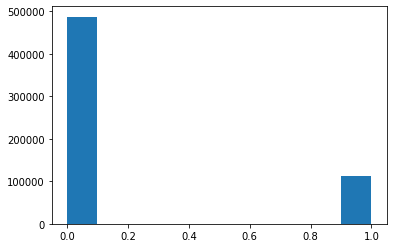

In [12]:
plt.hist(df.target)

We see that the target is **skewed** and thus the best metric for this binary
classification problem would be Area Under the ROC Curve (AUC). We can use
precision and recall too, but AUC combines these two metrics. Thus, we will be
using AUC to evaluate the model that we build on this dataset.

**Overall, there are:**

- Five binary variables
- Ten nominal variables
- Six ordinal variables
- Two cyclic variables
- And a target variable

**Let’s look at ord_2 feature in the dataset. It consists of six different categories:**

- Freezing
- Warm
- Cold
- Boiling Hot
- Hot
- Lava Hot

We need to
convert these categories to numbers. A simple way of doing this would be to create
a dictionary that maps these values to numbers starting from 0 to N-1, where N is
the total number of categories in a given feature.

In [14]:
mapping = {
"Freezing": 0,
"Warm": 1,
"Cold": 2,
"Boiling Hot": 3,
"Hot": 4,
"Lava Hot": 5
}

In [15]:
df.loc[:, "ord_2"] = df.ord_2.map(mapping)

In [17]:
df.ord_2.value_counts()

0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: ord_2, dtype: int64

This type of encoding of categorical variables is known as **Label Encoding**, i.e.,
we are encoding every category as a numerical label.

In [20]:
import pandas as pd
from sklearn import preprocessing
# read the data
df = pd.read_csv('../cat_train.csv')
# fill NaN values in ord_2 column
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")
# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()
# fit label encoder and transform values on ord_2 column
# P.S: do not use this directly. fit first, then transform
df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)

**You will see that I use fillna from pandas. The reason is LabelEncoder from scikitlearn
does not handle NaN values, and ord_2 column has NaN values in it.**

We can use this directly in many tree-based models or Boosted Trees model

This type of encoding cannot be used in linear models, support vector machines or
neural networks as they expect data to be normalized (or standardized).

**For these types of models, we can binarize the data**

Freezing --> 0 --> 0 0 0 <br>
Warm --> 1 --> 0 0 1 <br>
Cold --> 2 --> 0 1 0 <br>
Boiling Hot --> 3 --> 0 1 1 <br>
Hot --> 4 --> 1 0 0 <br>
Lava Hot --> 5 --> 1 0 1 <br>

This is just converting the categories to numbers and then converting them to their
binary representation. We are thus splitting one feature into three (in this case)
features (or columns). If we have more categories, we might end up splitting into a
lot more columns.

It becomes easy to store lots of binarized variables like this if we store them in a
sparse format. A sparse format is nothing but a representation or way of storing
data in memory in which you do not store all the values but only the values that
matter. In the case of binary variables described above, all that matters is where we
have ones (1s).

Even though the sparse representation of binarized features takes much less
memory than its dense representation, there is another transformation for
categorical variables that takes even less memory. This is known as **One Hot
Encoding**.

One hot encoding is a binary encoding too in the sense that there are only two
values, 0s and 1s. However, it must be noted that it’s not a binary representation.
Its representation can be understood by looking at the following example.

Let’s take a look at this code.

In [22]:
import numpy as np
from scipy import sparse
# create binary matrix
example = np.array(
[
[0, 0, 0, 0, 1, 0],
[0, 1, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0]
]
)
# print size in bytes
print(f"Size of dense array: {example.nbytes}")
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
# print size of this sparse matrix
print(f"Size of sparse array: {sparse_example.data.nbytes}")
full_size = (
sparse_example.data.nbytes +
sparse_example.indptr.nbytes +
sparse_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 72
Size of sparse array: 12
Full size of sparse array: 40


We see that the dense array size is much larger than the one with binarization.
However, the size of the sparse array is much less. Let’s try this with a much larger
array. In this example, we will use OneHotEncoder from scikit-learn to transform
our feature array with 1001 categories into dense and sparse matrices.

In [23]:
import numpy as np
from sklearn import preprocessing
# create random 1-d array with 1001 different categories (int)
example = np.random.randint(1000, size=1000000)
# initialize OneHotEncoder from scikit-learn
# keep sparse = False to get dense array
ohe = preprocessing.OneHotEncoder(sparse=False)
# fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
# print size in bytes for dense array
print(f"Size of dense array: {ohe_example.nbytes}")
# initialize OneHotEncoder from scikit-learn
# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncoder(sparse=True)
# fit and transform data with sparse one-hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
# print size of this sparse matrix
print(f"Size of sparse array: {ohe_example.data.nbytes}")
full_size = (
ohe_example.data.nbytes +
ohe_example.indptr.nbytes + ohe_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 8000000000
Size of sparse array: 8000000
Full size of sparse array: 16000004


Dense array size here is approximately 8GB and sparse array is 8MB.

These three methods are the most important ways to handle categorical variables.
There are, however, many other different methods you can use to handle categorical
variables. An example of one such method is about converting categorical variables
to numerical variables.

**Whenever you get categorical variables, follow these simple steps:**

- convert them to integers by applying label encoding using LabelEncoder
of scikit-learn or by using a mapping dictionary. If you didn’t fill up NaN
values with something, you might have to take care of them in this step
- create one-hot encoding. Yes, you can skip binarization!
- go for modelling! I mean the machine learning one

Handling NaN data in categorical features is quite essential else you can get the
infamous error from scikit-learn’s LabelEncoder: